<h2 style="color: green;">2. 활성화 함수</h2>

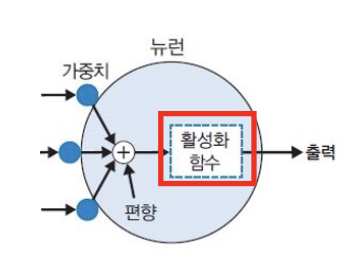
활성함수(activation function)는 인공신경망에서 입력 신호의 총합을 출력값으로 변환하는 함수입니다. 입력 신호는 다수의 가중치와 바이어스(bias)로 구성되며, 활성함수는 이를 입력으로 받아서 출력값을 계산합니다.

활성함수는 입력값에 대한 비선형 변환(non-linear transformation)을 수행합니다. 이 비선형성은 인공신경망이 복잡한 함수를 근사(appro ximation)할 수 있는 능력을 제공합니다. 선형 함수를 사용하면 여러 층으로 구성된 신경망도 결국 하나의 선형 함수로 표현됩니다.

주로 사용되는 활성함수로는 시그모이드(sigmoid), 하이퍼볼릭 탄젠트(tanh), 렐루(Rectified Linear Unit, ReLU), 소프트맥스(softmax) 등이 있습니다. 시그모이드와 하이퍼볼릭 탄젠트는 S자 형태의 곡선을 가지며, ReLU는 입력이 0보다 작으면 0, 그렇지 않으면 입력값을 그대로 출력합니다. 소프트맥스는 다중 클래스 분류 문제에 서 사용됩니다.

## *시그모이드(활성화 함수)*

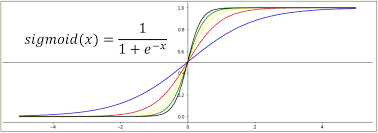
**시그모이드 함수는 로지스틱 함수(Logistic function)라고도 불리며, 인공 신경망에서 가장 많이 사용되는 활성화 함수 중 하나입니다. 시그모이드 함수는 이진 분류 문제에서 출력층의 활성화 함수로 많이 사용됩니다.**

시그모이드 함수는 입력값을 0과 1 사이의 값으로 변환시켜주는 비선형 함수로, 다음과 같은 수식으로 정의됩니다.

시그모이드 함수는 S자 형태의 그래프를 그리는데, 이는 입력값이 커질수록 1에 가까워지고, 입력값이 작 아질수록 0에 가까워짐을 나타냅니다.


이외에도 다층 퍼셉트론(MLP)에서 은닉층에 적용되어 비선형성을 부여하고, 그래디언트 소실 문제를 완 화하는 데에도 사용됩니다.하지만 시그모이드 함수는 출력값의 범위가 0과 1 사이로 한정되어 있기 때문에, 출력값이 경계값에 가까워지면 그래디언트가 소실되는 문제가 발생할 수 있습니다. 이러한 문제를 해결하기 위해 ReLU나 LeakyReLU 등의 활성화 함수가 사용되기도 합니다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

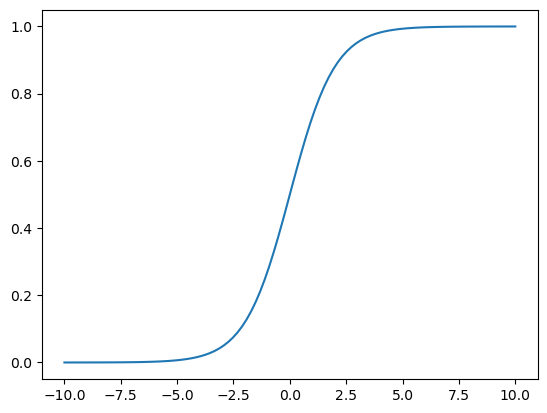

In [3]:
x = np.linspace(-10, 10, 100)  #-10부터 10까지 100개의 데이터
#print(x)
y = sigmoid(x)
#print(y)

plt.plot(x,y)
plt.show()

## *하이퍼볼릭 탄젠트 함수(활성화 함수)*

**하이퍼볼릭 탄젠트 함수(hyperbolic tangent function)는 시그모이드 함수와 비슷하지만 출력 범위가 -1에 서 1 사이인 함수입니다.**

하이퍼볼릭 탄젠트 함수는 시그모이드 함수와 마찬가지로 비선형 함수(non-linear function)이기 때문에 신경망의 활성 함수로 널리 사용됩니다. 또한, 시그모이드 함수와 달리 출력 범위가 -1에서 1 사이이기 때문에 입력의 부호를 유지하기 때문에 더 좋은 특성을 학습할 수 있습니다.

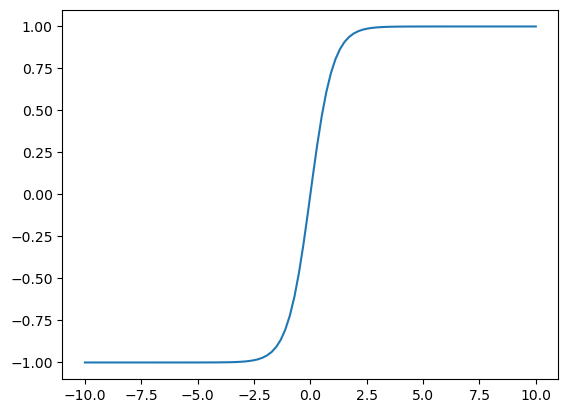

In [4]:
def tanh(x) :
    return np.tanh(x)

x = np.linspace(-10, 10, 100)  #-10부터 10까지 100개의 데이터
#print(x)
y = tanh(x)
#print(y)

plt.plot(x,y)
plt.show()

## *ReLU 함수 실습 (활성화 함수)*

**입력값이 0보다 작으면 0을 출력하고, 0 이상이면 입력값을 그대로 출력합니다. 수학적으로는 다음과 같은 함수입니다.**

+ 연산이 간단하고 빠르기 때문에, 계산 속도가 빠릅니다.

+ 입력값이 0이하인 경우, 그라디언트(gradient)가 0이 되어버리므로, 해당 뉴런은 다시 회복할 수 없게 됩니다. 이를 dying ReLU problem 이라고 합니다.

+ 이와 같은 문제를 해결하기 위해, LeakyReLU, PReLU와 같은 변형된 ReLU 함수가 제안되기도 합니다.


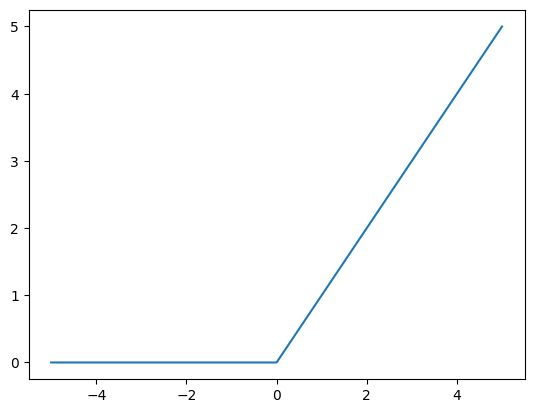

In [12]:
def relu(x) :
    #np.maximum(0, x)는 입력 x와 0 중에서 더 큰 값을 반환하는 함수입니다.
    return np.maximum(0, x)

x = np.linspace(-5, 5, 1000)
y = relu(x)

plt.plot(x,y)
plt.show()

## *Leaky ReLU 실습 (활성화 함수)*

Leaky ReLU 함수는 입력값이 음수인 경우에도 미분 가능하며, ReLU 함수에서 발생하는 'dying ReLU' 문제를 해결할 수 있습니다.

'dying ReLU' 문제란, 입력값이 음수일 경우에는 그 미분값이 0이 되어 역전파 시 가중치 업데이트가 이루어지지 않아 학습이 멈추는 현상을 말합니다.

이를 해결하기 위해 ReLU 함수의 변형 함수인 Leaky ReLU 함수가 제안되었습니다. ReLU 함수의 변형으로 음수 범위에서도 0이외의 값을 가질 수 있도록 설계된 함수가 Leaky ReLU 함수입니다.

Leaky ReLU 함수는 ReLU 함수와 비슷하지만, 입력값이 음수일 때 0 대신 0에 가까운 매우 작은 값을 반환합니다. 이 작은 값을 0.01과 같은 작은 상수값으로 지정할 수도 있습니다.

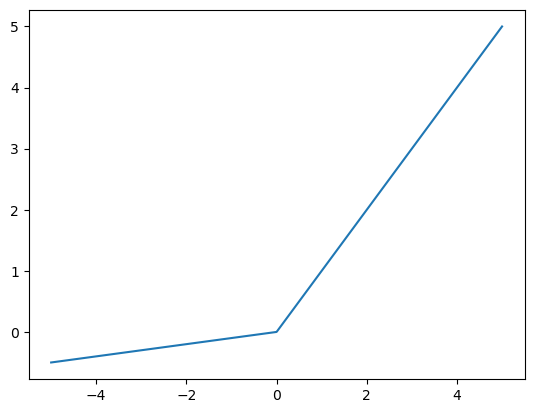

In [6]:
def leaky_relu(x, alpha=0.1) :
    """
    p.where 함수를 사용하여 입력값 x를 조건에 따라 변환합니다. 
    조건은 x >= 0로 설정되어 있으므로, x가 0 이상인 경우는 그대로 반환하고, x가 음수인 경우는 x에 alpha와 곱한 값을 반환합니다.
    이때 alpha는 Leaky ReLU의 음수 구간에서의 기울기를 정의하는 하이퍼파라미터로, 기본값은 0.01입니다.
    """
    return np.where(x >= 0, x, x * alpha)

x = np.linspace(-5, 5, 1000)
y = leaky_relu(x)

plt.plot(x,y)
plt.show()

## *소프트맥스 함수 (활성화 함수)*

소프트맥스 함수(softmax function)는 입력받은 값을 0과 1 사이의 값으로 정규화(normalization)하며, 모든 클래스에 대한 확률의 합이 1이 되도록 만들어주는 함수입니다. 주로 다중 클래스 분류 문제에서 출력층의 활성 함수로 사용됩니다.

예를 들어, 3개의 클래스를 분류하는 모델이 있다고 가정해보겠습니다. 이 모델은 출력층에 3개의 뉴런을 가지며, 각 뉴런은 해당 클래스에 속할 확률을 출력합니다. 소프트맥스 함수를 거치기 전의 출력값은 일반적으로 로짓(logit)이라고 부릅니다. 로짓은 임의의 실수값이 될 수 있으며, 이를 소프트맥스 함수를 통해 0과 1 사이의 값으로 정규화하면 확률 값을 얻을 수 있습니다.

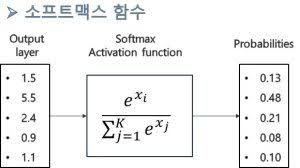
K는 백터 Z길이이며 소프트맥스 함수를 통해 변환된 벡터는 모든 요소의 합이 1이 됩니다.
이러한 성질 때문에 소프트맥스 함수는 분류 문제에서 각 클래스에 속할 확률을 예측하기 위해 주로 사용됩니다.

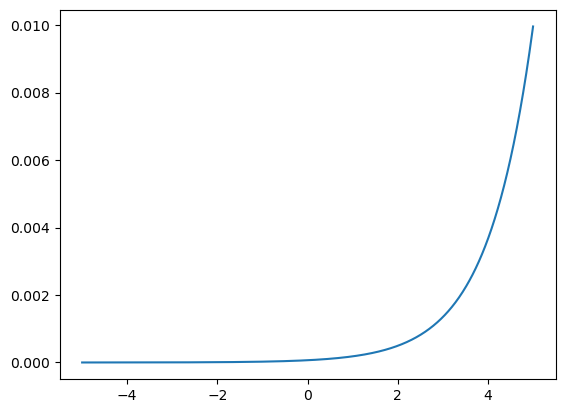

In [8]:
def softmax(x) :
    return np.exp(x) / np.sum(np.exp(x))

z = np.linspace(-10, 10, 100)
y = softmax(x)

plt.plot(x, y)
plt.show()

## 역전파

**역전파: 학습 과정에서는 역전파 알고리즘을 사용하여 손실 함수의 기울기를 계산합니다. 이 기울기는 출력층에서부터 거꾸로 은닉층과 입력층까지 전파됩니다. 각 층의 가중치는 이 기울기와 학습률을 이용하여 업데이트됩니다.**

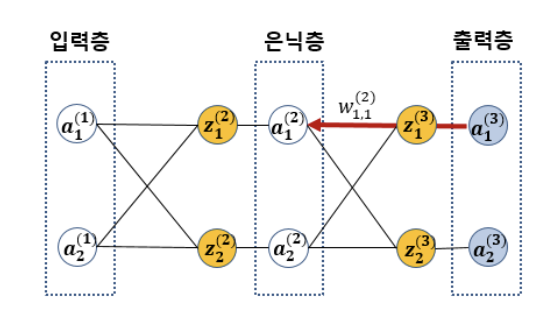
인공 신경망에서 가중치(weight)와 편향(bias)을 학습시키기 위한 알고리즘 중 하나입니다. 이 알고리즘은 손실 함수(loss function)를 최소화하는 가중치와 편향을 찾는 것이 목적입니다.

이후, 역전파 알고리즘을 통해 손실 함수의 값이 최소화되도록 가중치와 편향을 업데이트합니다. 이 알고리즘은 출력층에서부터 시작하여 입력층까지 역순으로 진행됩니다.

즉, 출력층에서부터 역방향으로 가중치와 편향이 각각 어떤 영향을 미치는지를 계산합니다. 이후, 이전 층에서 계산된 결과를 다음 층으로 전달하여 이전 층의 가중치와 편향에 대한 그래디언트(gradient)를 계산합니다. 이러한 과정을 모든 층에서 반복하여 최종적으로 입력층까지 도달합니다.

최종적으로 계산된 그래디언트를 이용해 가중치와 편향을 업데이트하며, 이 과정을 여러번 반복하면서 손실 함수의 값이 최소화되도록 가중치와 편향을 조정해나가는 것이 오차 역전파 알고리즘의 핵심입니다.

## *인공신경 실습 100 에포크마다 산점도 시각화*

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#인공신경망 모델 클래스 정의
class SimpleNet(nn.Module) :
    #nn.Module은 신경망의 구조와 동작에 필요한 많은 메서드와 기능을 제공
    """
    이진 분류 문제
    입력층 2개, 은닉층 1개(노드 5) 출력층 1개 (시그모이드 활성화 함수 사용)
    """
    
    def __init__(self) :
        super(SimpleNet, self).__init__()  #부모 클래스에 메서드 호출하는 방법
        #입력층과 은닉층 사이 노드
        self.fc1 = nn.Linear(2,5)
        #은닉층과 출력층 사이 노드
        self.fc2 = nn.Linear(5,1)
    
    def forward(self, x) :
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        
        return x

In [21]:
# 데이터 생성
x = torch.randn(100, 2)
# print(x)
y = ((x[:,0] > 0) & (x[:,1] > 0)).float()
# 첫번째 두번째 열이 모두 0이상일 때 True -> 1 False -> 0출력
# print(y)

# 모델 선언
model = SimpleNet()
#print(model)

# loss 함수랑 옵티마이저 정의
criterion = nn.BCELoss()
"""
옵티마이저는 학습 과정에서 손실 함수를 통해 계산된 오차를 기반으로 모델의 가중치를 업데이트하는 역할을 수행합니다.
학습 과정에서 모델의 가중치를 어떻게 조정해야 하는지 결정하는 것이 옵티마이저의 주요 역할입니다.
"""
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

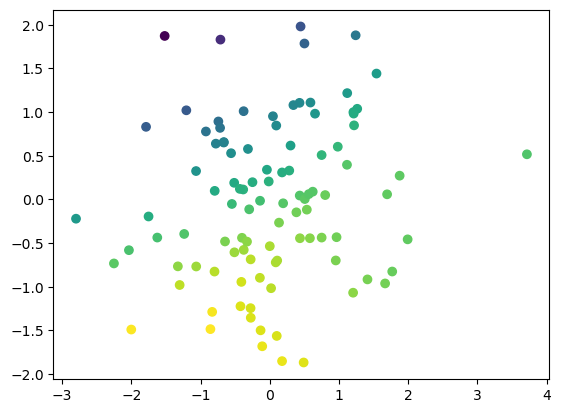

1번째 epoch 학습 완료


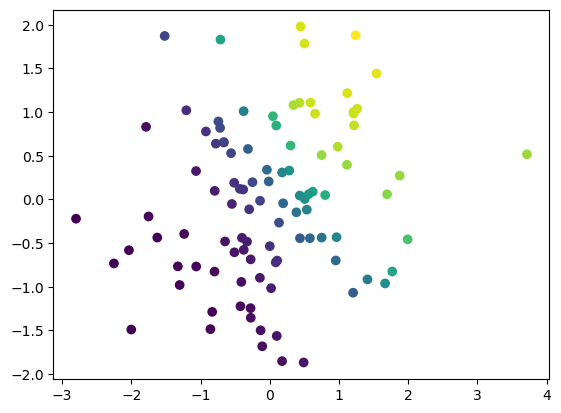

2번째 epoch 학습 완료


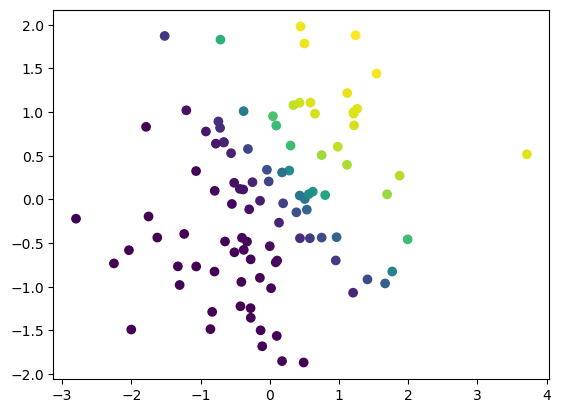

3번째 epoch 학습 완료


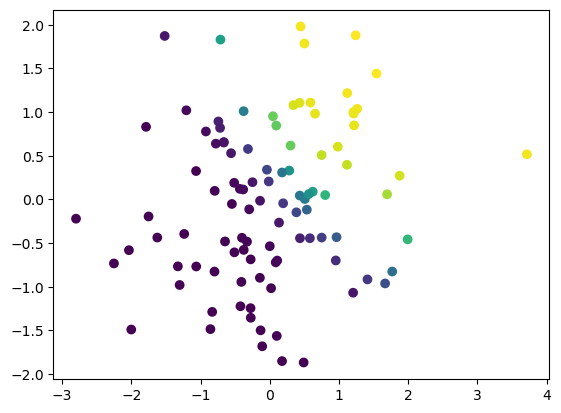

4번째 epoch 학습 완료


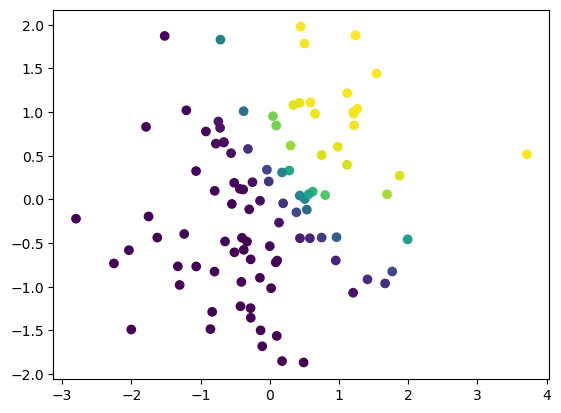

5번째 epoch 학습 완료


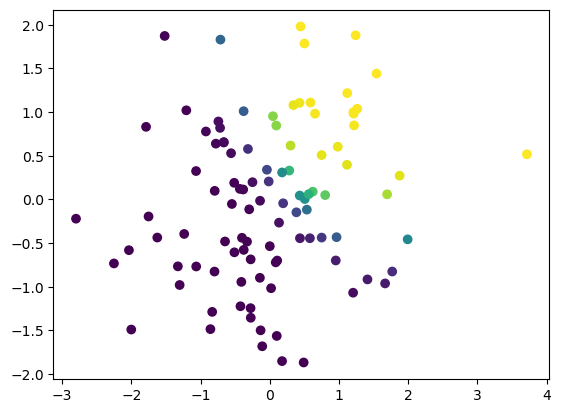

6번째 epoch 학습 완료


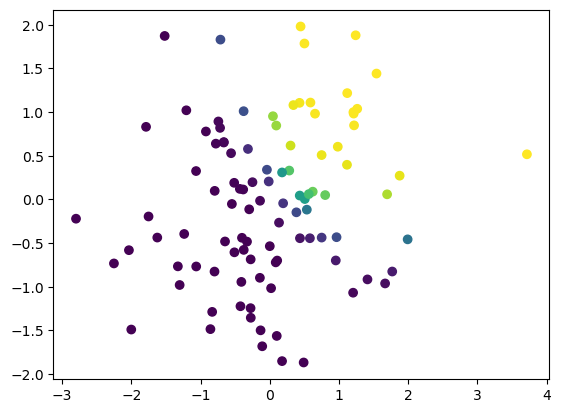

7번째 epoch 학습 완료


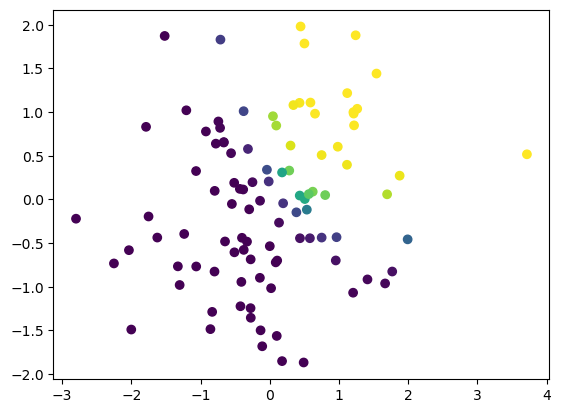

8번째 epoch 학습 완료


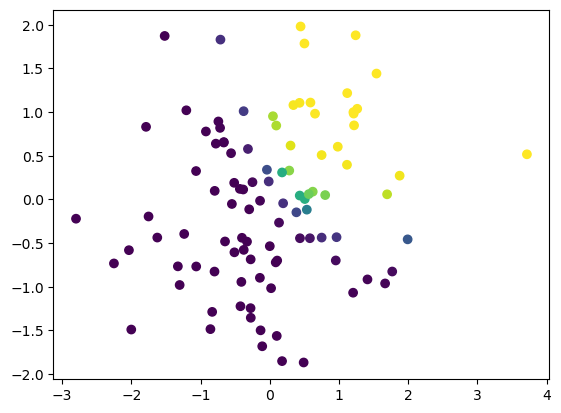

9번째 epoch 학습 완료


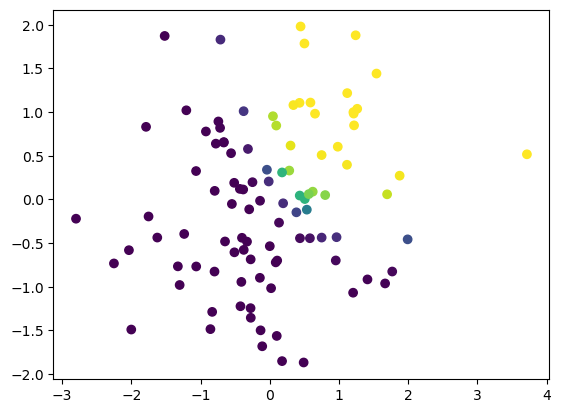

10번째 epoch 학습 완료
전체 학습완료


In [22]:
#학습
count = 0
for epoch in range(1000) :
    
    #순전파 단계
    y_pred = model(x)
    
    #loss
    #학습결과와 정답 라벨을 비교하여 손실함수 적용
    loss = criterion(y_pred.squeeze(), y)
    
    #역전파
    optimizer.zero_grad()  #옵티마이저의 모든 가중치에 대한 변화 0으로 초기화 -> 이전 기울기의 값이 남이있을 가능성을 배제
    loss.backward()  #손실함수 역전파 수행
    optimizer.step()  #옵티마이저 가중치 업데이트
    
    if epoch % 100 == 0 :
        plt.clf()
        plt.scatter(x[:,0], x[:,1], c=y_pred.detach().numpy().squeeze())
        """
        y_pred는 예측된 출력을 나타내는 변수입니다.
        detach() 함수를 사용하여 그래디언트를 분리하고 NumPy 배열로 변환한 다음 squeeze() 함수를 사용하여 
        불필요한 차원을 제거합니다. 이렇게 구한 예측값을 색으로 표시합니다.
        """
        plt.show()
        count = (count + 1)
        print(f"{count}번째 epoch 학습 완료")
        
print("전체 학습완료")